In [571]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Datei mit UTF-16-Codierung einlesen
data = pd.read_csv('data_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
values = pd.read_csv('values_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')
variables = pd.read_csv('variables_nfdi4chem2023_survey.csv', encoding='utf-16', delimiter='\t')

In [572]:
df_data = pd.DataFrame (data)
df_values = pd.DataFrame (values)
df_variables = pd.DataFrame (variables)

In [573]:
# Daten weiter bereinigen. Spalten und Zeilen mit NaN entfernen.
# DataFrame mit ausgewählten Spalten erstellen
selected_columns = ['CASE', 'A001', 'A001s', 'A002', 'A002_05', 'A003', 'A003_07', 'A004', 'A004_01', 'A004_02', 'A004_03', 'A004_04', 'A004_05', 'A004_06', 'A004_07', 'A004_08', 'A004_09', 'A004_10', 'A004_11', 'A004_12', 'A004_13', 'A004_13a', 'B001', 'B001_01', 'B001_02', 'B001_03', 'B001_04', 'B001_05', 'B001_06', 'B001_07', 'B001_08', 'B001_08a', 'B002', 'B003_01', 'B004', 'B005_01', 'B006', 'B006_01', 'B006_02', 'B006_03', 'B006_04', 'B006_04a', 'B006_05', 'B006_06', 'B007', 'B025_01', 'B008_CN', 'B008x01', 'B008x02', 'B008x03', 'B008x04', 'B008x05', 'B008x06', 'B008x07', 'B008x08', 'B008x09', 'B027_01', 'B009', 'B026_01', 'B010', 'B011', 'B012', 'B013_01', 'B014', 'B014_01', 'B014_02', 'B014_03', 'B014_04', 'B014_05', 'B014_06', 'B014_07', 'B014_08', 'B014_08a', 'B015', 'B015_01', 'B015_02', 'B015_03', 'B015_04', 'B015_05', 'B015_06', 'B015_08', 'B015_08a', 'B015_07', 'B016', 'B016_01', 'B016_02', 'B016_03', 'B016_04', 'B016_05', 'B016_06', 'B016_07', 'B016_09', 'B016_09a', 'B016_08', 'B017', 'B017_01', 'B017_02', 'B017_03', 'B017_04', 'B017_05', 'B017_05a', 'B018', 'B018_01', 'B019', 'B019_01', 'B019_02', 'B019_03', 'B019_04', 'B019_05', 'B019_05a', 'B019_06', 'B019_07', 'B019_08', 'B019_09', 'B019_10', 'B019_10a', 'B020_01', 'B021', 'B021_01', 'B022_01', 'B023_01', 'B024', 'B024_01', 'B024_02', 'B024_03', 'B024_04', 'B024_05', 'B024_06', 'B024_07', 'B024_08', 'B024_08a', 'C001', 'C002', 'C003', 'C003_01', 'C004', 'C005_01', 'C006', 'C008', 'C008_03', 'C009_01']
df_questions_2023 = df_data[selected_columns]

In [574]:
# Filtere die Zeilen, bei denen nach der Spalte A002 keine Einträge mehr folgen (alle Werte sind NaN)
result_rows = df_questions_2023[df_questions_2023.iloc[:, df_questions_2023.columns.get_loc('A002')+1:].isna().all(axis=1)]

# Entferne die gefundenen leeren Zeilen aus dem DataFrame 
# Erzeuge einen bereinigten DataFrame
df_cleanquest_2023 = df_questions_2023.drop(result_rows.index)

In [575]:
# Definiere die NFDI4Chem-Farben
petrol_rgb = (0/255, 156/255, 188/255)
orange_rgb = (238/255, 116/255, 0/255)
yellow_rgb = (241/255, 222/255, 30/255)

# Definiere die RGBA-Werte für die Farbe "petrol" in verschiedenen Transparenzstufen
petrol_rgba_100 = (*petrol_rgb, 1.0)  # 100% Transparenz
petrol_rgba_75 = (*petrol_rgb, 0.75)  # 75% Transparenz
petrol_rgba_50 = (*petrol_rgb, 0.50)  # 50% Transparenz
petrol_rgba_25 = (*petrol_rgb, 0.25)  # 25% Transparenz

palette_NFDI4Chem = ('#009CBC', '#EE7400', '#F1DE1E', '#7f7f7f')
NFDI4Chem = ('#009CBC', '#EE7400', '#F1DE1E', '#7f7f7f')

## What is the ratio of data sharing within the working group/institute to outside the organisation?

### How do you share your data within your working group?

In [576]:
df_B015 = df_cleanquest_2023.filter(like='B015')
#----
col_name_clear_B015 = {
    'B015': 'Ausweichoption (negativ) oder Anzahl',
    'B015_01': 'Electronic lab journal',
    'B015_02': 'Via server of institute/working group',
    'B015_03': 'Cloud system',
    'B015_04': 'E-Mail',
    'B015_05': 'USB stick, DVD, CD',
    'B015_06': 'Data repository',
    'B015_07': ' I do not share my data.',
    'B015_08': 'other data',
    'B015_08a': 'open text'
}
#----
df_B015 = df_B015.rename(columns=col_name_clear_B015)

df_B015_count = df_B015.apply(lambda col: (col == 2).sum()).to_frame()

df_B015_count.reset_index(inplace=True)
df_B015_count.rename(columns={'index':'kind of media', 0:'quantity'}, inplace=True)

df_B015_count = df_B015_count.drop(0)

#----
df_B015_a = df_cleanquest_2023['B015_08a'].value_counts().to_frame()

df_B015_a.reset_index(inplace=True)

df_B015_a.rename(columns={'index': 'kind of media', 'B015_08a': 'quantity'}, inplace=True)

#----
df_B015_a['kind of media'] = df_B015_a['kind of media'].apply(lambda x: 'Lab Journal/Book' if 'lab' in x.lower() else
                                                              ('Supporting Information' if 'publish' in x.lower() else
                                                               ('Cloud system' if 'sciebo' in x.lower() or 'cloud' in x.lower () else
                                                                ('Tape' if 'tape' in x.lower() or 'magnet' in x.lower () else
                                                                 ('Wiki' if 'wiki' in x.lower() else
                                                                  ('Via server of institute/working group' if 'server' in x.lower() else
                                                                   ('Harddrive' if 'hard' in x.lower() else 
                                                                    ('Electronic lab journal' if 'lims' in x.lower () else x))))))))


df_B015_grouped = df_B015_a.groupby('kind of media')['kind of media'].count().reset_index(name='quantity')

df_B015_sorted = df_B015_grouped.sort_values(by='quantity', ascending=False)
#----

df_B015_merge = pd.merge(df_B015_count, df_B015_sorted, on='kind of media', how='outer')

df_B015_merge['quantity_inside'] = df_B015_merge[['quantity_x', 'quantity_y']].sum(axis=1)

df_B015_merge.drop_duplicates(subset='kind of media', inplace=True)

df_B015_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)

#----

df_B015_merge.at[8, 'kind of media'] = 'Not sharing data.'

rows_to_delete_B015 = [6,7]

df_B015_merge = df_B015_merge.drop(rows_to_delete_B015)

#----

print(df_B015_merge)

                                        kind of media  quantity_inside
0                              Electronic lab journal            137.0
1               Via server of institute/working group            483.0
2                                        Cloud system            225.0
3                                              E-Mail            326.0
4                                  USB stick, DVD, CD            160.0
5                                     Data repository             66.0
8                                   Not sharing data.             11.0
9                                    Lab Journal/Book              4.0
10                                          Harddrive              2.0
11                                               Wiki              2.0
12           ELN will be introduced for everyone soon              1.0
13                                             GitHub              1.0
14                                            Network              1.0
15    

### How do you share your data outside your working group?

In [577]:
df_B016 = df_cleanquest_2023.filter(like='B016')
#----

col_name_clear_B016 = {
    'B016': 'Ausweichoption (negativ) oder Anzahl',
    'B016_01': 'Electronic lab journal',
    'B016_02': 'Via server of institute/working group',
    'B016_03': 'Cloud system',
    'B016_04': 'E-Mail',
    'B016_05': 'USB stick, DVD, CD',
    'B016_06': 'Data repository',
    'B016_07': 'Publication as data publication or Supplementary Information.',
    'B016_08': 'I do not share my data.',
    'B016_09': 'other data',
    'B016_09a': 'open text'
}

df_B016 = df_B016.rename(columns=col_name_clear_B016)

df_B016_count = df_B016.apply(lambda col: (col == 2).sum()).to_frame()

df_B016_count.reset_index(inplace=True)

df_B016_count.rename(columns={'index':'kind of media', 0:'quantity'}, inplace=True)

df_B016_count = df_B016_count.drop(0)
#----

df_B016_a = df_cleanquest_2023['B016_09a'].value_counts().to_frame()

df_B016_a.reset_index(inplace=True)

df_B016_a.rename(columns={'index': 'kind of media', 'B016_09a': 'quantity'}, inplace=True)
#----

df_B016_a['kind of media'] = df_B016_a['kind of media'].apply(lambda x: 'Cryptshare' if 'cryp' in x.lower() else
                                                              ('I do not share my data.' if 'share' in x.lower() else
                                                               ('Cloud system' if 'sciebo' in x.lower() or 'hessen' in x.lower () else
                                                                ('Publication as data publication or Supplementary Information.' if 'public' in x.lower() else x))))

df_B016_grouped = df_B016_a.groupby('kind of media')['kind of media'].count().reset_index(name='quantity')

df_B016_sorted = df_B016_grouped.sort_values(by='quantity', ascending=False)
#----

df_B016_merge = pd.merge(df_B016_count, df_B016_sorted, on='kind of media', how='outer')

df_B016_merge['quantity_outside'] = df_B016_merge[['quantity_x', 'quantity_y']].sum(axis=1)

df_B016_merge.drop_duplicates(subset='kind of media', inplace=True)

df_B016_merge.drop(['quantity_x', 'quantity_y'], axis=1, inplace=True)
#----

df_B016_merge.at[9, 'kind of media'] = 'Not sharing data.'

rows_to_delete_B016 = [7,8]

df_B016_merge = df_B016_merge.drop(rows_to_delete_B016)

print(df_B016_merge)

                                        kind of media  quantity_outside
0                              Electronic lab journal              14.0
1               Via server of institute/working group              85.0
2                                        Cloud system             255.0
3                                              E-Mail             387.0
4                                  USB stick, DVD, CD              62.0
5                                     Data repository             117.0
6   Publication as data publication or Supplementa...             281.0
9                                   Not sharing data.              77.0
10                                         Cryptshare               2.0
11                                             GitHub               1.0
12                                          Harddrive               1.0
13                                             Other.               1.0
14                                      Presentations           

In [578]:
outside_inside = pd.merge (df_B015_merge, df_B016_merge, how="outer")
outside_inside

,kind of media,quantity_inside,quantity_outside
0,Electronic lab journal,137.0,14.0
1,Via server of institute/working group,483.0,85.0
2,Cloud system,225.0,255.0
3,E-Mail,326.0,387.0
4,"USB stick, DVD, CD",160.0,62.0
5,Data repository,66.0,117.0
6,Not sharing data.,11.0,77.0
7,Lab Journal/Book,4.0,NaN
8,Harddrive,2.0,1.0
9,Wiki,2.0,NaN


In [579]:
outside_inside_sorted = outside_inside.sort_values(by='quantity_outside', ascending=False)
# Index neu setzen
outside_inside_sorted.reset_index(drop=True, inplace=True)
outside_inside_sorted

,kind of media,quantity_inside,quantity_outside
0,E-Mail,326.0,387.0
1,Publication as data publication or Supplementa...,NaN,281.0
2,Cloud system,225.0,255.0
3,Data repository,66.0,117.0
4,Via server of institute/working group,483.0,85.0
5,Not sharing data.,11.0,77.0
6,"USB stick, DVD, CD",160.0,62.0
7,Electronic lab journal,137.0,14.0
8,Cryptshare,NaN,2.0
9,Harddrive,2.0,1.0


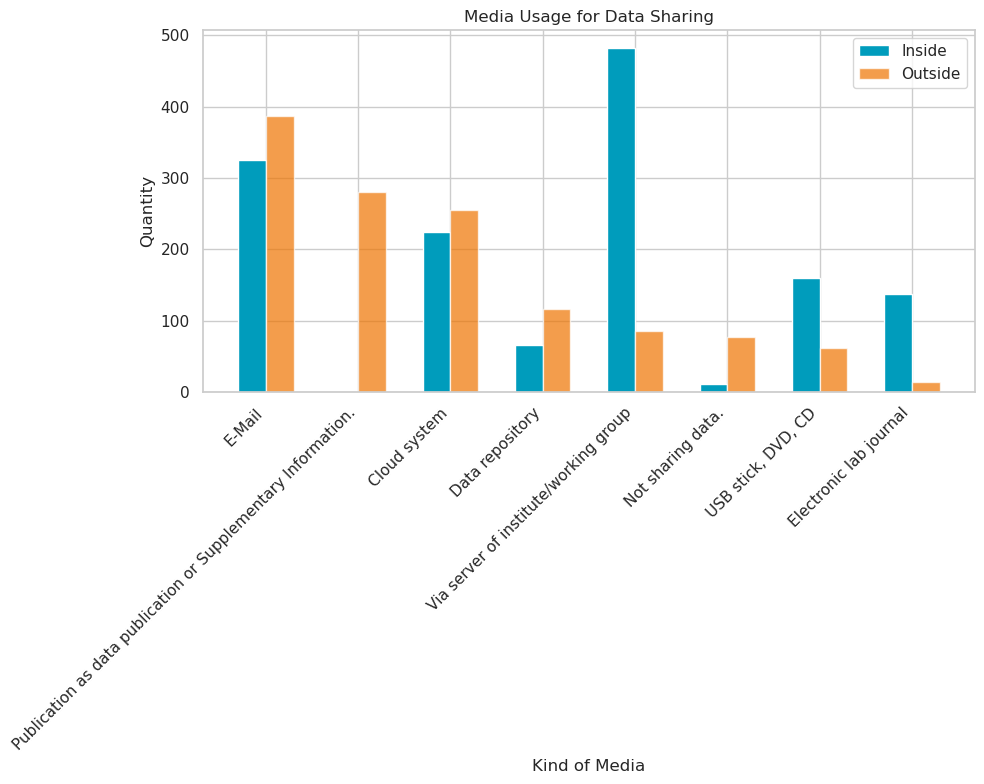

In [580]:
# nebeneinander liegendes Balkendiagramm erstellen
plt.figure(figsize=(10, 8))
bar_width = 0.3  # Breite der Balken

outside_inside_sorted_filter = outside_inside_sorted[(outside_inside_sorted['quantity_inside'] > 10) | (outside_inside_sorted['quantity_outside'] > 10)]

plt.bar(outside_inside_sorted_filter.index, outside_inside_sorted_filter['quantity_inside'], width=bar_width, label='Inside', color=petrol_rgb)
plt.bar(outside_inside_sorted_filter.index + bar_width, outside_inside_sorted_filter['quantity_outside'], width=bar_width, label='Outside', color=orange_rgb, alpha=0.7)

plt.xlabel('Kind of Media')
plt.ylabel('Quantity')
plt.title('Media Usage for Data Sharing')
plt.xticks(outside_inside_sorted_filter.index + bar_width / 2, outside_inside_sorted_filter['kind of media'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()

plt.show()

## Who is publishing the most data? And in which way?

### Which position do you have in your institution? Have you already published your data in the form of raw data, processed data or analysed data?

In [581]:
values_A003=df_values[df_values["VAR"]=="A003"]
df_cleanquest_2023["A003-m"]=df_cleanquest_2023["A003"].map(values_A003.drop_duplicates("RESPONSE").set_index("RESPONSE")["MEANING"])
df_cleanquest_2023["A003-m"]
df_cleanquest_2023[["A003-m","B017_01", "B017_02", "B017_03", "B017_04", "B017_05"]]

,A003-m,B017_01,B017_02,B017_03,B017_04,B017_05
0,Other:,NaN,NaN,NaN,NaN,NaN
1,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
3,nicht beantwortet,NaN,NaN,NaN,NaN,NaN
7,PhD student,1.0,1.0,1.0,2.0,1.0
8,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
806,Professor,2.0,1.0,1.0,1.0,1.0
807,Postdoc/Research Scientist/Permanent Researcher,2.0,2.0,2.0,1.0,1.0
809,Professor,1.0,1.0,1.0,2.0,1.0
810,Other:,NaN,NaN,NaN,NaN,NaN


In [582]:
# neuen DataFrame mit den ausgewählten Spalten erstellen
selected_columns_publish_position = ["A003-m","B017_01", "B017_02", "B017_03", "B017_04", "B017_05"]
df_publish_position = df_cleanquest_2023[selected_columns_publish_position].copy()
df_publish_position

,A003-m,B017_01,B017_02,B017_03,B017_04,B017_05
0,Other:,NaN,NaN,NaN,NaN,NaN
1,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
3,nicht beantwortet,NaN,NaN,NaN,NaN,NaN
7,PhD student,1.0,1.0,1.0,2.0,1.0
8,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
806,Professor,2.0,1.0,1.0,1.0,1.0
807,Postdoc/Research Scientist/Permanent Researcher,2.0,2.0,2.0,1.0,1.0
809,Professor,1.0,1.0,1.0,2.0,1.0
810,Other:,NaN,NaN,NaN,NaN,NaN


In [583]:
# Define the mapping for replacement
publish_position_mapping = {1: 'No', 2: 'Yes'}

df_publish_position = df_publish_position.replace(publish_position_mapping)

col_name_clear_B017_A003 = {
    'B017_01': 'supplemental material (text publication)',
    'B017_02': 'data repository (text publication)',
    'B017_03': 'data publication (stand alone)',
    'B017_04': 'No data published',
    'B017_05': 'Other',
    'A003-m': 'Position'
    
}

df_publish_position = df_publish_position.rename(columns=col_name_clear_B017_A003)
df_publish_position

,Position,supplemental material (text publication),data repository (text publication),data publication (stand alone),No data published,Other
0,Other:,NaN,NaN,NaN,NaN,NaN
1,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
3,nicht beantwortet,NaN,NaN,NaN,NaN,NaN
7,PhD student,No,No,No,Yes,No
8,Postdoc/Research Scientist/Permanent Researcher,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
806,Professor,Yes,No,No,No,No
807,Postdoc/Research Scientist/Permanent Researcher,Yes,Yes,Yes,No,No
809,Professor,No,No,No,Yes,No
810,Other:,NaN,NaN,NaN,NaN,NaN


In [584]:
positions = ['Professor', 'Postdoc/Research Scientist/Permanent Researcher', 'PhD student', 'Master student', 'Researcher in Industry', 'Bachelor student']

for position in positions:
    df_position = df_publish_position[df_publish_position['Position'] == position]

    selected_columns = ['supplemental material (text publication)',
                        'data repository (text publication)',
                        'data publication (stand alone)',
                        'No data published']

    yes_counts = df_position[selected_columns].apply(lambda col: (col == 'Yes').sum())

    print(f"Yes counts for position '{position}':")
    print(yes_counts)
    print("\n")

Yes counts for position 'Professor':
supplemental material (text publication)    121
data repository (text publication)           50
data publication (stand alone)               21
No data published                            23
dtype: int64


Yes counts for position 'Postdoc/Research Scientist/Permanent Researcher':
supplemental material (text publication)    116
data repository (text publication)           47
data publication (stand alone)               13
No data published                            22
dtype: int64


Yes counts for position 'PhD student':
supplemental material (text publication)     92
data repository (text publication)           30
data publication (stand alone)               10
No data published                           116
dtype: int64


Yes counts for position 'Master student':
supplemental material (text publication)     7
data repository (text publication)           2
data publication (stand alone)               1
No data published                           3

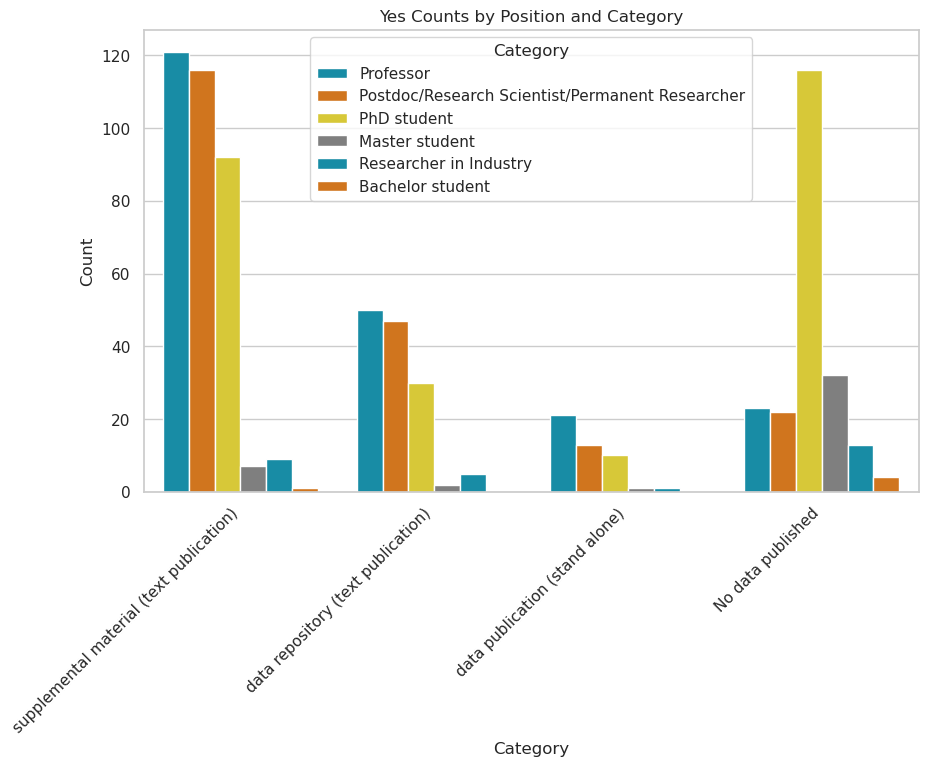

In [585]:
data_position = {
    'Position': ['Professor', 'Postdoc/Research Scientist/Permanent Researcher', 'PhD student', 'Master student', 'Researcher in Industry', 'Bachelor student'],
    'supplemental material (text publication)': [121, 116, 92, 7, 9, 1],
    'data repository (text publication)': [50, 47, 30, 2, 5, 0],
    'data publication (stand alone)': [21, 13, 10, 1, 1, 0],
    'No data published': [23, 22, 116, 32, 13, 4]
}

df_publish_counts = pd.DataFrame(data_position)

# DataFrame für die Darstellung im Balkendiagramm
df_melted = df_publish_counts.melt(id_vars=['Position'], var_name='Category', value_name='Count')

# Visualisierung

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', hue='Position', data=df_melted, palette=palette_NFDI4Chem)
plt.xticks(rotation=45, ha="right")
plt.title("Yes Counts by Position and Category")
plt.ylabel("Count")
plt.legend(title='Category')
plt.show()

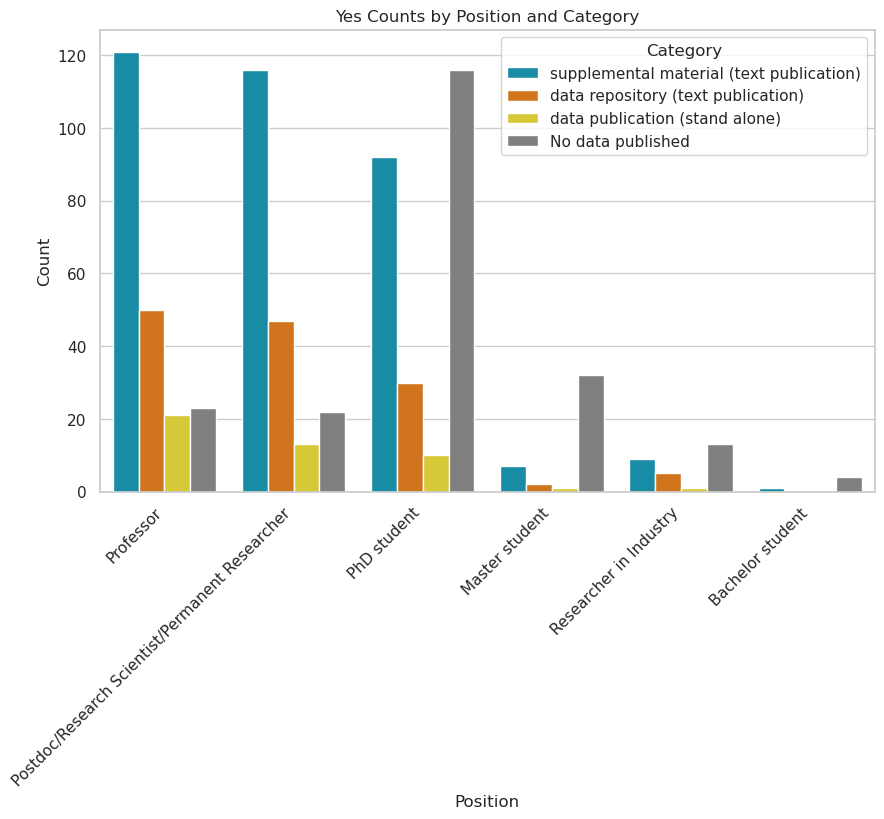

In [586]:
# Visualisierung

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Position', y='Count', hue='Category', data=df_melted, palette=palette_NFDI4Chem)
plt.xticks(rotation=45, ha="right")
plt.title("Yes Counts by Position and Category")
plt.ylabel("Count")
plt.legend(title='Category')
plt.show()

## Which subdiscipline is publishing the most data? And in which way?

### To which discipline do you assign yourself? Have you already published your data in the form of raw data, processed data or analysed data?

In [587]:
# neuen DataFrame mit den ausgewählten Spalten erstellen
selected_columns_publish_subdiscipline = ["A004_01",'A004_02','A004_03','A004_04','A004_05','A004_06','A004_07','A004_08','A004_09','A004_10','A004_11','A004_12',"B017_01", "B017_02", "B017_03", "B017_04"]
df_publish_subdiscipline = df_cleanquest_2023[selected_columns_publish_subdiscipline].copy()
df_publish_subdiscipline

,A004_01,A004_02,A004_03,A004_04,A004_05,A004_06,A004_07,A004_08,A004_09,A004_10,A004_11,A004_12,B017_01,B017_02,B017_03,B017_04
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
7,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
807,1.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0
809,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
810,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN


In [588]:
# Define the mapping for replacement
publish_subdiscipline_mapping = {1: 'No', 2: 'Yes'}

df_publish_subdiscipline = df_publish_subdiscipline.replace(publish_subdiscipline_mapping)

col_name_clear_B017_A004 = {
    'A004_01': 'Inorganic chemistry',
    'A004_02': 'Organic chemistry',
    'A004_03': 'Physical chemistry',
    'A004_04': 'Chemical engineering',
    'A004_05': 'Theoretical chemistry',
    'A004_06': 'Pharmacy/Pharmaceutical chemistry',
    'A004_07': 'Material science',
    'A004_08': 'Biochemistry',
    'A004_09': 'Analytical chemistry',
    'A004_10': 'Metabolomics',
    'A004_11': 'Proteomics',
    'A004_12': 'Medicinal chemistry',
    'B017_01': 'supplemental material (text publication)',
    'B017_02': 'data repository (text publication)',
    'B017_03': 'data publication (stand alone)',
    'B017_04': 'No data published',
}

df_publish_subdiscipline = df_publish_subdiscipline.rename(columns=col_name_clear_B017_A004)
df_publish_subdiscipline

,Inorganic chemistry,Organic chemistry,Physical chemistry,Chemical engineering,Theoretical chemistry,Pharmacy/Pharmaceutical chemistry,Material science,Biochemistry,Analytical chemistry,Metabolomics,Proteomics,Medicinal chemistry,supplemental material (text publication),data repository (text publication),data publication (stand alone),No data published
0,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN
1,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN
3,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN
7,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes
8,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
807,No,Yes,No,Yes,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Yes,Yes,No
809,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
810,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,NaN,NaN,NaN,NaN


In [589]:
subdisciplines = ['Inorganic chemistry', 'Organic chemistry', 'Physical chemistry', 'Chemical engineering', 'Theoretical chemistry','Pharmacy/Pharmaceutical chemistry','Material science','Biochemistry','Analytical chemistry','Metabolomics','Proteomics','Medicinal chemistry']

selected_columns = ['supplemental material (text publication)',
                    'data repository (text publication)',
                    'data publication (stand alone)',
                    'No data published']

for subdiscipline in subdisciplines:
    df_subdiscipline = df_publish_subdiscipline[df_publish_subdiscipline[subdiscipline] == 'Yes']

    print(f"Yes counts for subdiscipline '{subdiscipline}':")
    
    for selected_column in selected_columns:
        count = (df_subdiscipline[selected_column] == 'Yes').sum()
        print(f"{selected_column}: {count}")
    
    print("\n")

Yes counts for subdiscipline 'Inorganic chemistry':
supplemental material (text publication): 106
data repository (text publication): 38
data publication (stand alone): 11
No data published: 62


Yes counts for subdiscipline 'Organic chemistry':
supplemental material (text publication): 132
data repository (text publication): 37
data publication (stand alone): 21
No data published: 63


Yes counts for subdiscipline 'Physical chemistry':
supplemental material (text publication): 75
data repository (text publication): 31
data publication (stand alone): 13
No data published: 44


Yes counts for subdiscipline 'Chemical engineering':
supplemental material (text publication): 24
data repository (text publication): 8
data publication (stand alone): 3
No data published: 19


Yes counts for subdiscipline 'Theoretical chemistry':
supplemental material (text publication): 31
data repository (text publication): 18
data publication (stand alone): 4
No data published: 19


Yes counts for subdiscipli

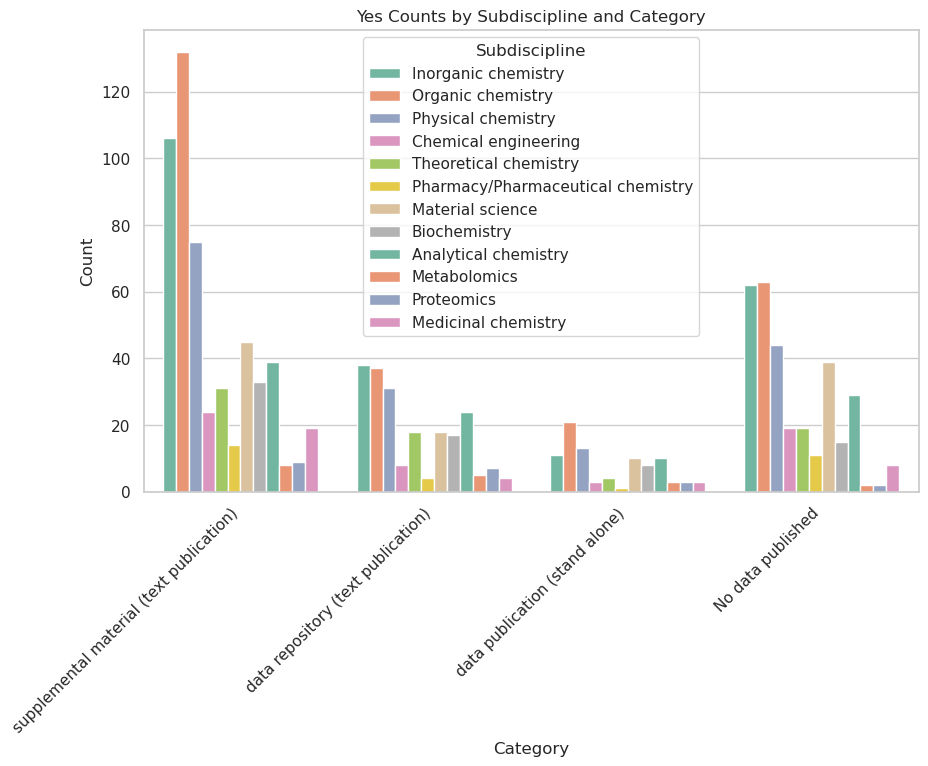

In [590]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daten für die Subdisziplin-Zählungen
data_subdiscipline = {
    'subdiscipline': ['Inorganic chemistry', 'Organic chemistry', 'Physical chemistry', 'Chemical engineering', 'Theoretical chemistry', 'Pharmacy/Pharmaceutical chemistry', 'Material science', 'Biochemistry', 'Analytical chemistry', 'Metabolomics', 'Proteomics', 'Medicinal chemistry'],
    'supplemental material (text publication)': [106, 132, 75, 24, 31, 14, 45, 33, 39, 8, 9, 19],
    'data repository (text publication)': [38, 37, 31, 8, 18, 4, 18, 17, 24, 5, 7, 4],
    'data publication (stand alone)': [11, 21, 13, 3, 4, 1, 10, 8, 10, 3, 3, 3],
    'No data published': [62, 63, 44, 19, 19, 11, 39, 15, 29, 2, 2, 8]
}

# DataFrame für die Subdisziplin-Zählungen
df_subdiscipline_counts = pd.DataFrame(data_subdiscipline)

# DataFrame für die Darstellung im Balkendiagramm
df_melted = df_subdiscipline_counts.melt(id_vars=['subdiscipline'], var_name='Category', value_name='Count')

# Visualisierung
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette_NFDI4Chem = sns.color_palette("Set2", len(df_subdiscipline_counts))
sns.barplot(x='Category', y='Count', hue='subdiscipline', data=df_melted, palette=palette_NFDI4Chem)
plt.xticks(rotation=45, ha="right")
plt.title("Yes Counts by Subdiscipline and Category")
plt.ylabel("Count")
plt.legend(title='Subdiscipline')
plt.show()


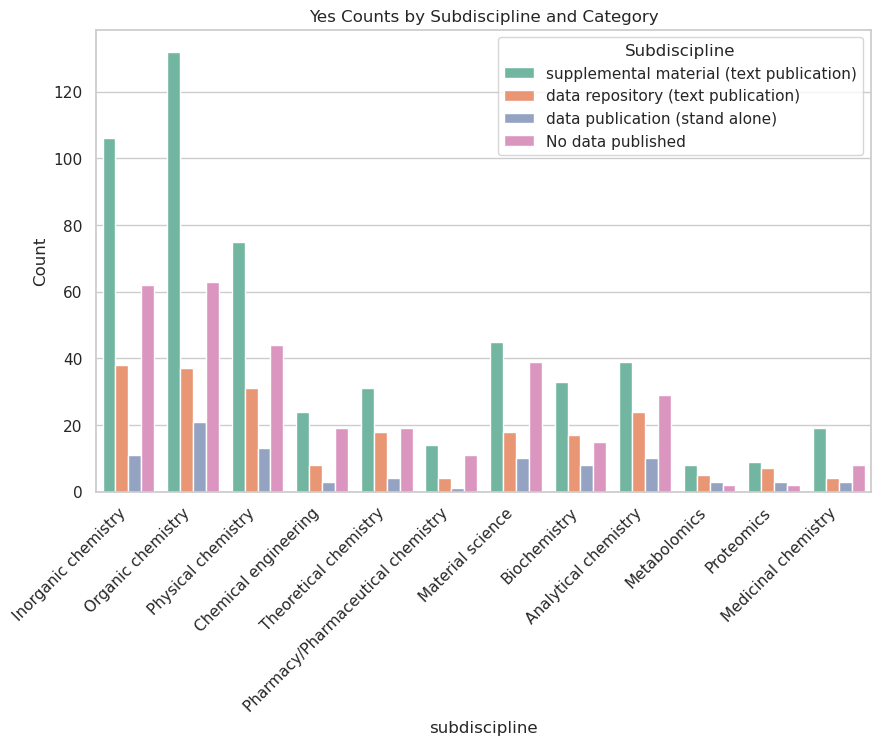

In [591]:
# Visualisierung
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
palette_NFDI4Chem = sns.color_palette("Set2", len(df_subdiscipline_counts))
sns.barplot(x='subdiscipline', y='Count', hue='Category', data=df_melted, palette=palette_NFDI4Chem)
plt.xticks(rotation=45, ha="right")
plt.title("Yes Counts by Subdiscipline and Category")
plt.ylabel("Count")
plt.legend(title='Subdiscipline')
plt.show()